In [141]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
ls

2012-18_officialBoxScore.csv*  2017-18_standings.csv*
2012-18_playerBoxScore.csv*    2017-18_teamBoxScore.csv*
2012-18_standings.csv*         Untitled.ipynb
2012-18_teamBoxScore.csv*      injuries.csv*
2016-17_officialBoxScore.csv*  metadata_officialBoxScore.pdf*
2016-17_playerBoxScore.csv*    metadata_playerBoxScore.pdf*
2016-17_standings.csv*         metadata_standing.pdf*
2016-17_teamBoxScore.csv*      metadata_teamBoxScore.pdf*
2017-18_officialBoxScore.csv*  teamBoxScore.csv*
2017-18_playerBoxScore.csv*


In [78]:
players = pd.read_csv("2012-18_playerBoxScore.csv")
players['gmDate']= players['gmDate'].apply(lambda x:pd.to_datetime(x))

In [18]:
ij = pd.read_csv("injuries.csv")
ij.head(2)


,Date,Team,Acquired,Relinquised,Notes
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Acchilles tendon (out indefinitely)


In [138]:

l = [i for i in range(len(ij)) if ij.loc[i]['Notes'].find("poison")!=-1]
ij.loc[l]

[200,
 519,
 967,
 1488,
 1841,
 3989,
 4355,
 4479,
 4492,
 5069,
 6748,
 6814,
 7133,
 8807]

In [140]:
#ij['Notes'].value_counts()[-40:]

In [19]:
ij['Date'] = ij['Date'].apply(lambda x:pd.to_datetime(x))

In [86]:
a = ij[ij['Date']>pd.to_datetime("2012-10-29")]

#a[a['Acquired']==a['Acquired']].head(1)

In [87]:
#a[a['Acquired']=='Derrick Rose'].append(a[a['Relinquised']=='Derrick Rose']).reset_index().sort_values('index').head(1)

In [114]:
jokic_injuries = [i for i in a[a['Relinquised']=='Nikola Jokic']['Date']]
a1 = jokic_injuries[2]

In [93]:
a[a['Relinquised']=='Nikola Jokic']

,Date,Team,Acquired,Relinquised,Notes
6394,2015-11-03,Nuggets,NaN,Nikola Jokic,strained lower back (DTD)
8111,2017-01-06,Nuggets,NaN,Nikola Jokic,illness (DTD)
8264,2017-01-27,Nuggets,NaN,Nikola Jokic,strained left hip flexor (DTD)
9038,2017-11-30,Nuggets,NaN,Nikola Jokic,sprained left ankle (DTD)


/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


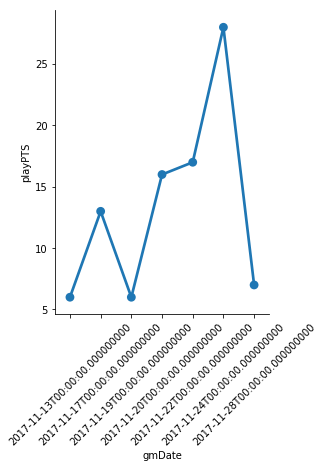

In [143]:
b = players[players['playLNm']=='Jokić'].reset_index()
#a1 = pd.to_datetime("2017-11-30")
if len(b[b['gmDate']==a1])>0:
    print("here")
    game_injury_index = b[b['gmDate']==a1].index[0]
    pre_inj = b.loc[range(game_injury_index-7,game_injury_index)]
    post_inj = b.loc[range(game_injury_index,game_injury_index+7)]
pre = sb.factorplot(data=pre_inj,x="gmDate",y="playPTS")
pre.set_xticklabels(rotation=45)
plt.show()

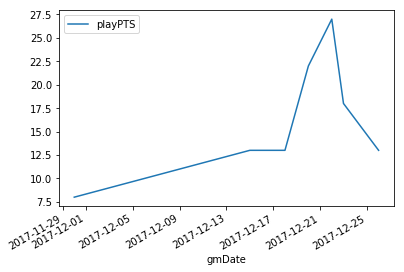

In [116]:
post_inj.plot("gmDate","playPTS")

In [91]:
b[b['gmDate']==a1]

,index,gmDate,gmTime,seasTyp,playLNm,playFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,teamDayOff,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,playDispNm,playStat,playMin,playPos,playHeight,playWeight,playBDate,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,playFGM,playFG%,play2PA,play2PM,play2P%,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptDayOff


In [104]:
b.loc[167]

index                      134458
gmDate        2017-11-17 00:00:00
gmTime                      10:30
seasTyp                   Regular
playLNm                     Jokić
playFNm                    Nikola
teamAbbr                      DEN
teamConf                     West
teamDiv                 Northwest
teamLoc                      Home
teamRslt                      Win
teamDayOff                      4
offLNm1                    Wright
offFNm1                      Sean
offLNm2                     Kogut
offFNm2                     Marat
offLNm3                    Cutler
offFNm3                     Kevin
playDispNm           Nikola Jokić
playStat                  Starter
playMin                        27
playPos                         C
playHeight                     82
playWeight                    254
playBDate              1995-02-19
playPTS                        13
playAST                         6
playTO                          2
playSTL                         0
playBLK       